# CS 505 Homework 01:  Exploratory Data Analysis 

#### Due Wednesday  9/13 at midnight (1 minute after 11:59 pm) in Gradescope (with a grace period of 6 hours)
#### You may submit the homework up to 24 hours late (with the same grace period) for a penalty of 10%. 

All homeworks will be scored with a maximum of 100 points; point values are given
for individual problems, and if parts of problems do not have point values given, they
will be counted equally toward the total for that problem. 

The goals of this first homework are that you

1. Get up to speed on Python, Jupyter Notebooks, and Google Colab (by going through the various tutorials or other resources as needed);
2. Practice the submission process through Gradescope (and allow us to practice the grading process); 
3. Get started thinking about programming with textual data; and 
4. Practice exploratory data analysis, often an excellent first step in any project, to understand the basic characteristics of your data set. 

Note: I strongly recommend you work in **Google Colab** (the free version) to complete homeworks in this class; in addition to (probably) being faster than your laptop, all the necessary libraries will already be available to you, and you don't have to hassle with <code>conda</code>, <code>pip</code>, etc. and resolving problems when the install doesn't work. But it is up to you!   You should go through the necessary tutorials listed on the web site concerning Colab and storing files on a Google Drive. And of course, Dr. Google is always ready to help you resolve your problems. 

I will post a  "walk-through" video ASAP on my <a href="https://www.youtube.com/channel/UCfSqNB0yh99yuG4p4nzjPOA">Youtube Channel</a>. 

#### Submission Instructions

You must complete the homework by editing <b>this notebook</b> and submitting the following two files in Gradescope by the due date and time:

  - A file <code>HW01.ipynb</code> (be sure to select <code>Kernel -> Restart and Run All</code> before you submit, to make sure everything works); and
  - A file <code>HW01.pdf</code> created from the previous.
  
  For best results obtaining a clean PDF file on the Mac, select <code>File -> Print Review</code> from the Jupyter window, then choose <code>File-> Print</code> in your browser and then <code>Save as PDF</code>.  Something  similar should be possible on a Windows machine -- just make sure it is readable and no cell contents have been cut off. Make it easy to grade!
  
The date and time of your submission is the last file you submitted, so if your IPYNB file is submitted on time, but your PDF is late, then your submission is late. 

## Collaborators (5 pts)

Describe briefly but precisely

1. Any persons you discussed this homework with and the nature of the discussion;
2. Any online resources you consulted and what information you got from those resources; and
3. Any AI agents (such as chatGPT or CoPilot) or other applications you used to complete the homework, and the nature of the help you received. 

A few brief sentences is all that I am looking for here. 
    
    PythonRefresher: I grabbed the recipes of customizating plots
    CS 506: Another course that exhaustively make me practice the use of map() and reduce()
    StackOverflow: Counter.most_common(), dictionary related functions like .items() and .pop()
    ChatGPT and Python documentation: searched for and confirmed and definition of certain concepts, 
        e.g. what is dict_list, what Counter does, how to adjust space in format print

## Overview

In this homework, we will download some text from the well-known <a href="https://en.wikipedia.org/wiki/Brown_Corpus"> Brown Corpus</a> in the Natural Language Toolkit (NLTK),
and explore some of its statistical properties. 

In addition to exploring the Wiki page just linked, you may also want to consult section 1.3 of the book chapter  <a href="https://www.nltk.org/book/ch02.html">Accessing Text Corpora and Lexical Resources</a> accompanying the NLTK system.  

We are going to collect some basic statistical information about this corpus, and display it in various useful forms.  Consult the <a href="https://www.cs.bu.edu/fac/snyder/cs237/tutorials/">tutorials</a> as described above (especially <code>PythonRefresher.ipynb</code>) for recipes for dictionaries, sets, plots, and bar charts; for this first
homework, we are providing sample outputs of at least the figures at the bottom of this notebook to guide your thinking. You should try to duplicate these closely, especially with titles, axis labels, and legends. 

You may add additional code as needed, but
anything other than simply filling in where it says <code># your code here</code> should be accompanied by appropriate comments explaining what it does. 

Read through the next few cells and understand what the code is doing, and then
proceed to the problems. 


In [1]:
import numpy as np
import nltk

# The first time you will need to download the corpus:
 
nltk.download('brown')

# After the first time, Python will see that you already have it and not download it again. 
# This is a typical paradigm for datasets that you download onto your local machine.  


[nltk_data] Downloading package brown to /Users/yfsong/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [2]:
from nltk.corpus import brown

# We can access various components of this multi-text corpus: words, sentences, and 
# paragraphs, both raw and tagged with part-of-speech (POS) labels.  
# (We won't be using the tagged ones right now.)

print("Words (a list of strings):\n")
print(brown.words())

print("\nWords with POS tags (a list of tuples):\n")
print(brown.tagged_words())

print("\nSentences (a list of lists of strings):\n")
print(brown.sents())

print("\nSentences with POS-tagged words:\n")
print(brown.tagged_sents())

print("\nParagraphs (a list of lists of lists of strings):\n")
print(brown.paras())

print("\nParagraphs in various categories, here are reviews:\n")
print(brown.paras(categories='reviews'))


Words (a list of strings):

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

Words with POS tags (a list of tuples):

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

Sentences (a list of lists of strings):

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

Sentences with POS-tagged words:

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 

### Problem One (40 points): Characters

First we will explore this corpus at the level of characters. Each part of the problem is worth 10 points. 

In [3]:
# Part A

# Print out the number of occurrences of characters in the brown corpus. There are no restrictions, so letters,
# upper or lower case, parentheses, white space, any character (printing or otherwise) at all.
# Make this readable by a human, e.g., "There are xxx occurrences of characters in the Brown corpus."

# Hint: use the brown.words list and read about the Python join function. You'll be using this list
# of characters a lot in this problem, so calculate it once and assign it to an appropriately-named variable. 

# I strongly recommend you read about f-strings (introduced in Python 3.6) and use them as your default format
# for Python print statements. 


# Your code here
from collections import Counter

chars_str = ''.join(brown.words())  # join the words to be a long string
chars_lst = list(chars_str)  # turn the long string to a list
dict_chars = Counter(chars_lst)   # create a frequency dictionary that indicates the occurrences of each char
total_occur = sum(list(dict_chars.values()))  # get all occurrences by adding up those of individual char  
print(f'There are {total_occur} occurrences of characters in the Brown corpus.')

There are 4965882 occurrences of characters in the Brown corpus.


In [4]:
# Part B

# Print out the number of unique characters which occur in the Brown corpus (in other words, duplicate
# occurrences do not count), and then print out a string consisting of all these characters, sorted in order. 
# Again, always print this information out in a readable form: "There are xxx unique...."

# Hint: read about the Python functions set(...) and sorted(...)

# Your code here
chars_set = set(chars_lst)   # a set eliminate duplicates, so only unique characters remain
sorted_chars = sorted(dict_chars, key=lambda x: dict_chars[x], reverse=True)  # sort the character dictionary by occurrences in descending order
sorted_chars_str = ' '.join(sorted_chars)  # format the sorted result to a string for printing
print(f'There are {len(chars_set)} unique characters which occur in the Brown corpus.')
print(f'The unique characters in sorted order are:\n{sorted_chars_str}')

There are 83 unique characters which occur in the Brown corpus.
The unique characters in sorted order are:
e t a o i n s r h l d c u m f p g w y b , . v k ' ` T - I A S x H C M B W ; 1 P q j ? 0 z F D N R G O L E J 2 ) ( 5 9 : 3 U Y ! K 4 6 8 7 V $ Q / * & % Z X { } [ ] +


#### NOTE:  We will NOT be using the list of unique characters in the rest of this problem; whenever 'characters' are mentioned, we mean occurrences of characters, as in Part A. 

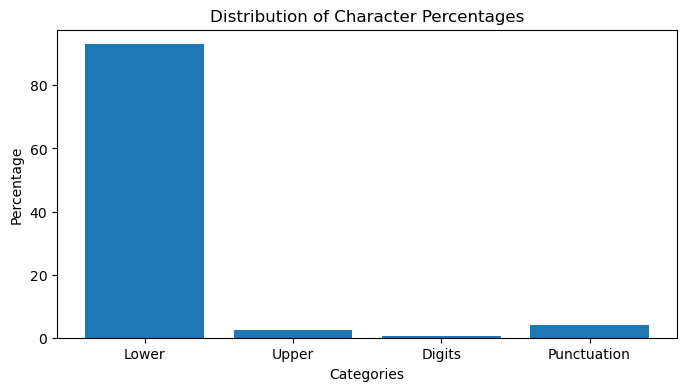

In [5]:
# Part C

# Display a bar chart of the percentages of the characters that are in the following categories:  ASCII lower-case letters, 
# ASCII upper-case letters, digits, punctuation marks (the Brown corpus does not contain anything but these).
# Display this as a bar chart, labelling each of the bars as 'Lower', 'Upper','Digits', 'Punctuation'.
# You do not need to show the exact percentages in the figure (see the sample output).

# Use a figsize of (8,4) so that the figures are not too small. 

# Hint: import the Python string library (see https://docs.python.org/3/library/string.html) and use the 
# string constants specified there. Look at the "Probability Distribution for Coin Flips" in the 
# PythonRefresher for how to create bar charts with labels on the bars. 

# Be sure to give percentages on the Y axis, not probabilities. 

# For a sample of what we expect, see the very bottom of this notebook. 

# Your code here
import matplotlib.pyplot as plt
import string
from functools import reduce  # freshly learned tool from CS 506

# separate out 4 different categories
lwcase = [x for x in dict_chars.keys() if x in string.ascii_lowercase]
upcase = [x for x in dict_chars.keys() if x in string.ascii_uppercase]
digits = [x for x in dict_chars.keys() if x in string.digits]
punc = [x for x in dict_chars.keys() if x in string.punctuation]
X_lsts = [lwcase, upcase, digits, punc]

# add up occurrences of each category
freq = []
for lst in X_lsts:
    freq.append(reduce(lambda m,n: m+n, [dict_chars[k] for k in lst], 0))

# map the lambda function of computing percentages to the list of frequencies
Y = list(map(lambda x: 100*(x/total_occur), freq))
    
plt.figure(num=1, figsize=(8,4))
plt.bar(['Lower','Upper','Digits','Punctuation'], Y)
plt.title('Distribution of Character Percentages')
plt.xlabel("Categories")
plt.ylabel("Percentage")
plt.show()

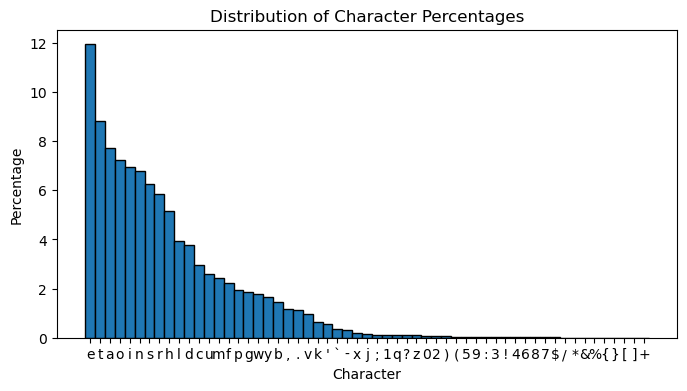

In [6]:
# Part D

# Print out a bar chart of the percentages of each character, in decreasing order. Make this case-insensitive, 
# so upper and lower letters are different; for example 'H' and 'h' are the same letter.  

# Hint:  Read about the Python function lower() and Counter from the Collections library.  

# For a sample of what we expect, see the very bottom of this notebook. 

# Your code here
import copy

dict_chars_copy = dict_chars.copy()  # make a copy of dict_chars

# add the occurrences of uppercase char to their lowercase counterpart
for k, v in dict_chars_copy.items():
    if k in string.ascii_uppercase:
        k_lower = k.lower()
        dict_chars_copy[k_lower] += dict_chars_copy[k]  

# remove uppercase chars to restore the correct total occurrences
for k in string.ascii_uppercase:
    dict_chars_copy.pop(k)

# prepare X (char in descending order of occurrences) and Y (percentages)
# Counter.most_common() is a shortcut for sorting the dict by occurrences
X = [x[0] for x in dict_chars_copy.most_common()]
Y = [100*(y[1]/total_occur) for y in dict_chars_copy.most_common()]

plt.figure(num=1, figsize=(8,4))
plt.bar(X, Y, width=1.0, edgecolor='black')
plt.title('Distribution of Character Percentages')
plt.ylabel('Percentage')
plt.xlabel('Character')
plt.show()

### Problem Two (50 points):  Words

Next we will explore the Brown corpus at the level of words. A "word" in this problem will be case-insensitive,
so you will create a list of the brown words in lower case and use it throughout the problem. 

Each part is worth 10 points. 

In [7]:
# Part A

# Print out the number of occurrences of words, and the number of unique words. Make your analysis
# case-insensitive (of course, this will only make a difference in the number of unique words). 
# Print the answer out in human-readable form. Always make it easy for the reader to understand your results!

# Hint: First create a list of lower-case words, and use it throughout this problem instead of brown.words()

# Your code here
words_lower = [w.lower() for w in brown.words()]  # turn all words lower-case
dict_words = Counter(words_lower)  # create a frequency dictionary that indicates the occurrences of each word
total_w_occur = sum(list(dict_words.values()))  # get all occurrences by adding up those of individual word  
print(f'There are {total_w_occur} occurrences of words in the Brown corpus.')
print(f'There are {len(dict_words.keys())} unique words which occur in the Brown corpus.')

There are 1161192 occurrences of words in the Brown corpus.
There are 49815 unique words which occur in the Brown corpus.


#### NOTE:  Again, we will NOT be using the list of unique words in the rest of this problem; whenever 'words' are mentioned, we mean occurrences of words, as in the first part of Part A. 

In [8]:
# Part B

# Print out the length of the longest word(s), and all occurrences of words of that maximum length.
# Print each of the words on a separate line, preceeded by a tab '\t'.
# (There may be only one, and it may not look familiar -- just use the data as given!)


# Your code here
# sort the dict for words to be in decreasing order of occurrences
sorted_words = sorted(dict_words.items(), key=lambda x: len(x[0]), reverse=True) 
# extract max length
len_longest = len(sorted_words[0][0])
print(f'The length of the longest word(s) is {len_longest}.')
# get all longest_words
longest_words = [w[0] for w in sorted_words if len(w[0]) == len_longest]
print(f'All occurrences of words with the max length are:')
for w in longest_words:
    print(f'\t{w}')

The length of the longest word(s) is 33.
All occurrences of words with the max length are:
	nnuolapertar-it-vuh-karti-birifw-


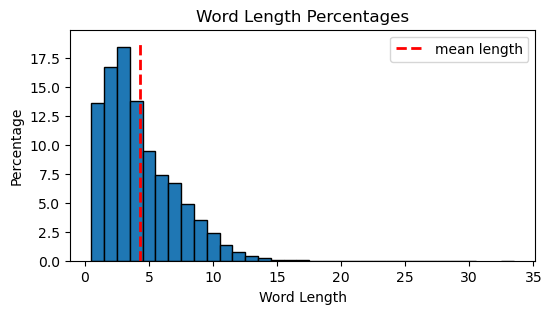

In [9]:
# Part C

# Display a bar chart of the percentages of word lengths of all occurrences of words 
# and give the average length of a word. Draw a dotted red vertical line whose height is the height
# of the highest bar, and whose x position is the average word length; give a legend explaining
# what the bar means (see PythonRefresher, as usual, for examples of how to do this). 

# Print out a human-readable statement about the average word length (to 4 decimal places) below the bar chart. 

# For a sample of what we expect, see the very bottom of this notebook. 

# Your code here
# transform the dict of words to one with keys as unique length
dict_w_len = {}
for k, v in dict_words.items():
    k_new = len(k)
    if k_new not in dict_w_len:
        dict_w_len[k_new] = v
    else:
        dict_w_len[k_new] += v

# sort the length dict in increasing order
sorted_w_len = sorted(dict_w_len.items(), reverse=False)

# prepare X (lengths in ascending order), Y (percentages), and mean = sum of key*value / total_occur
X = [x[0] for x in sorted_w_len]
Y = [100*(y[1]/total_w_occur) for y in sorted_w_len]
mean = reduce(lambda m,n: m+n, [x[0]*x[1] for x in sorted_w_len], 0) / total_w_occur

plt.figure(num=1, figsize=(6,3))
plt.bar(X, Y, width=1.0, edgecolor='black')
plt.plot([mean,mean], [0,19], lw=2, linestyle='--', color='red', label='mean length')
plt.legend()
plt.title('Word Length Percentages')
plt.ylabel('Percentage')
plt.xlabel('Word Length')
plt.show()

In [10]:
# Part D

# Now we will consider word frequencies (expressed as percentages). To simplify matters, we will only 
# allow "normal" words, i.e., those consisting of only lower-case letters, with possible single quotes, 
# periods, and dashes. Since this involves regular expressions (we'll cover next Tuesday, 9/11), 
# this code is provided. 

# Your task in this problem is to give the twenty most common normal words, in decreasing order, and the percentage of
# all occurrences of normal words these represent. Be sure to give your answer as percentages to 2 decimal places. 

# Hint: this is very similar to Part D in the previous problem. 

import re

p = re.compile('[a-zA-Z\'.`-]+$')       # allow intra-word punctuation
q = re.compile('[\'".`-]+$')

def is_normal_word(w):
    return (p.match(w) and not q.match(w))

# Your code here  
# filter out normal words out of the word dict
normal_keys = [w for w in dict_words if is_normal_word(w)] 
# create a dict for normal word and their occurrences
dict_nm_words = {k: dict_words[k] for k in normal_keys}  
# sort the normal word dict in descending order of occurrences
sorted_nm_words = sorted(dict_nm_words.items(), key=lambda w: w[1], reverse=True) 
# compute the total occurrences of all normal words
total_nm_words = sum(list(dict_nm_words.values()))
# get the top twenty most common normal words
top_twenty = [w[0] for w in sorted_nm_words[:20]]
# compute percentages for top twenty
percentages = [100*(w[1]/total_nm_words) for w in sorted_nm_words[:20]]
print(f'The twenty most common normal words in descending order:')
print('word\tpercentages')
for i in range(20):
    print(f"'{top_twenty[i]}'\t{percentages[i]:.2f}")

The twenty most common normal words in descending order:
word	percentages
'the'	6.97
'of'	3.63
'and'	2.87
'to'	2.61
'a'	2.31
'in'	2.13
'that'	1.06
'is'	1.01
'was'	0.98
'he'	0.95
'for'	0.95
'it'	0.87
'with'	0.73
'as'	0.72
'his'	0.70
'on'	0.67
'be'	0.64
'at'	0.54
'by'	0.53
'i'	0.51


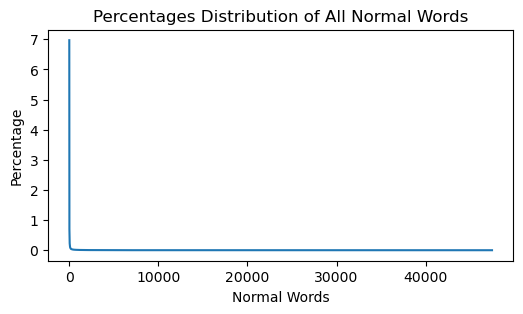

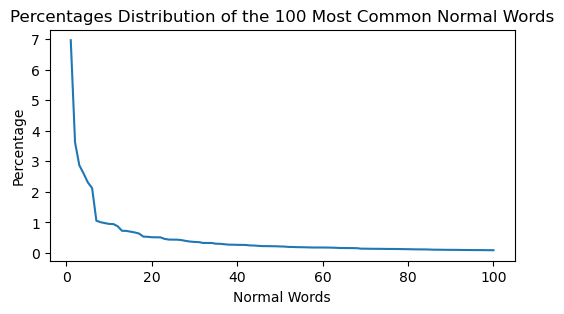

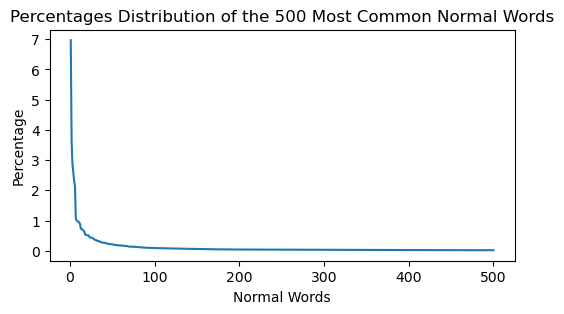

In [11]:
# Part E

# Now give the distribution of the percentages of normal word occurrences, in decreasing order, 
# just as you did for Problem One, Part E, but now for words. 

# You may give this as a bar chart, but it is more readable as a plot (i.e., using plot(...) instead of bar(...))

# Show this for all normal words, then for the 100 most common normal words, then for the 500 most 
# common normal words. 

# For a sample of what we expect, see the very bottom of this notebook. 

# Your code here
# prepare Xs and Ys
X_all = list(range(1, len(sorted_nm_words)+1))  # Word Rank
Y_all = [100*(y[1]/total_nm_words) for y in sorted_nm_words]
X_100 = list(range(1, len(sorted_nm_words[:100])+1))
Y_100 = [100*(y[1]/total_nm_words) for y in sorted_nm_words[:100]]
X_500 = list(range(1, len(sorted_nm_words[:500])+1))
Y_500 = [100*(y[1]/total_nm_words) for y in sorted_nm_words[:500]]
Xs = [X_all, X_100, X_500]
Ys = [Y_all, Y_100, Y_500]
names = ['All', 'the 100 Most Common', 'the 500 Most Common']

# use for loop to reduce redundancy of codes for plotting 
for i in range(3):
    plt.figure(num=1, figsize=(6,3))
    plt.plot(Xs[i], Ys[i])
    plt.title(f'Percentages Distribution of {names[i]} Normal Words')
    plt.ylabel('Percentage')
    plt.xlabel('Normal Words')
    plt.show()

### Problem Three (5 points):  Paragraphs

Ok, one more, just for fun!  Produce a histogram of the length of all sentences, with the average length
indicated, similar to what you did for Problem 2, Part C. Again, just consider a sentence to
be anything in `brown.sents()`.

Hint: You should be able to cut and paste your solution from 2.C and just change a few things. 

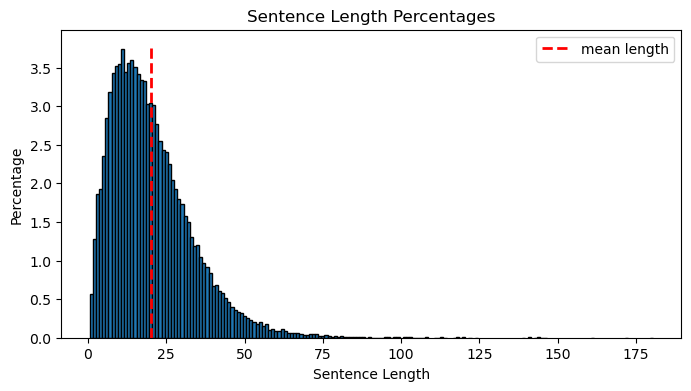

In [12]:
# Your code here
# create a list of sentence length by mapping len() to all sentences 
len_sents = [len(s) for s in list(brown.sents())]
# compute the number of sentences
total_sents = len(len_sents)
# create a dict for sentences' length
dict_s_len = Counter(len_sents)
# sort the len dict by the occurrences in increasing order
sorted_s_len = sorted(dict_s_len.items(), reverse=False)
# prepare X (length rank in ascending order), Y (percentages), and mean = sum of key*value / total_sents
X = [x[0] for x in sorted_s_len]
Y = [100*(y[1]/total_sents) for y in sorted_s_len]
mean = reduce(lambda m,n: m+n, [x[0]*x[1] for x in sorted_s_len], 0) / total_sents

plt.figure(num=1, figsize=(8,4))
plt.bar(X, Y, width=1.0, edgecolor='black')
plt.plot([mean,mean], [0,3.8], lw=2, linestyle='--', color='red', label='mean length')
plt.legend()
plt.title('Sentence Length Percentages')
plt.ylabel('Percentage')
plt.xlabel('Sentence Length')
plt.show()

### Sample Outputs for the Bar Charts

Problem 1.C

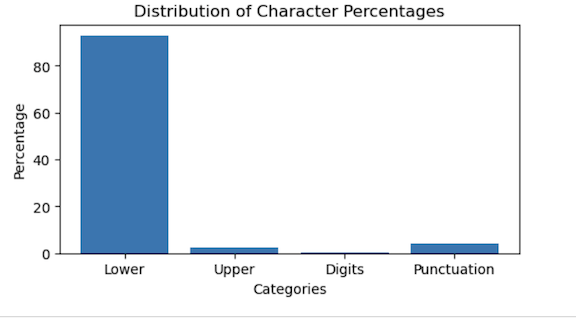

Problem 1.D

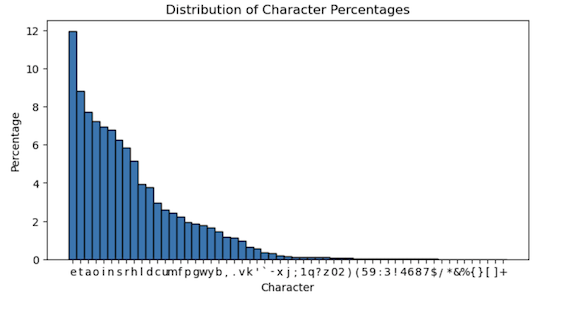

Problem 2.C

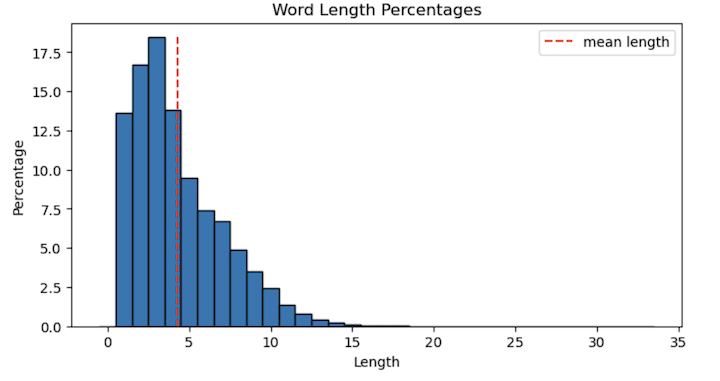

Problem 2.D

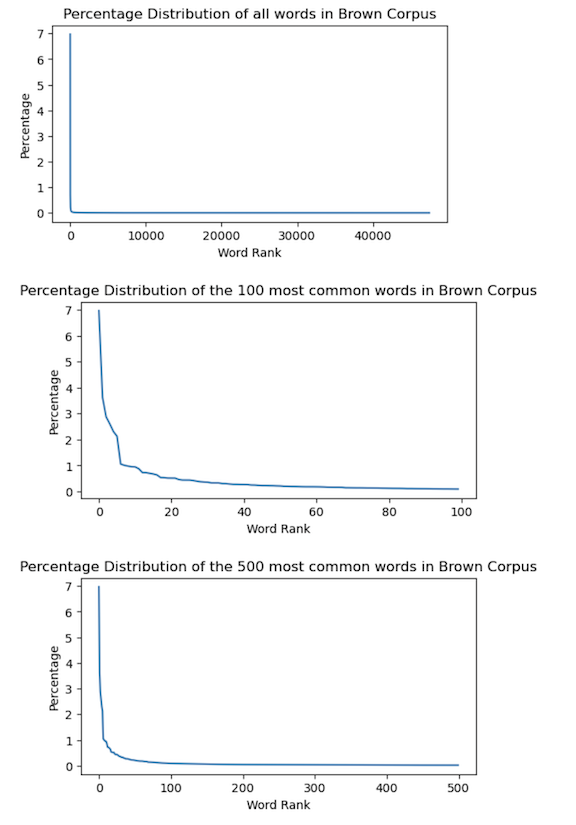

Problem 3

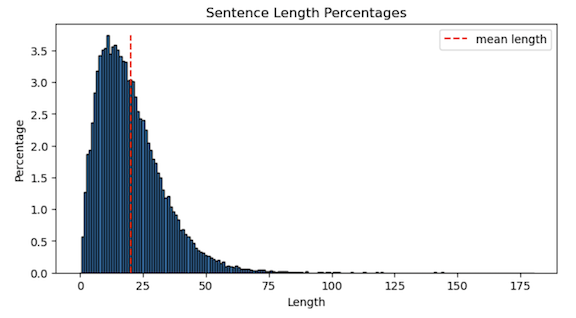